In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
csv_path = "1990-2019_annual_GENERATION_state.csv"

In [12]:
df = pd.read_csv(csv_path,header=None)
df = df.rename(columns=df.iloc[1])
df.columns
df = df[["YEAR","STATE","TYPE OF PRODUCER","ENERGY SOURCE","GENERATION (Megawatthours)"]]
df = df[df["STATE"] != "US-Total"]
df = df.drop(df.index[[0,1]])
df = df.reset_index()
df.nunique()

index                         53171
YEAR                             30
STATE                            53
TYPE OF PRODUCER                  6
ENERGY SOURCE                    14
GENERATION (Megawatthours)    42892
dtype: int64

In [13]:
clean = df[["YEAR", "ENERGY SOURCE", "GENERATION (Megawatthours)"]]
clean.set_index("YEAR")
cleaned = clean[clean["ENERGY SOURCE"] != "Total"]
cleaned["GENERATION (Megawatthours)"] = cleaned["GENERATION (Megawatthours)"].apply(lambda x: float(x.split()[0].replace(',', '')))
cleaned["ENERGY SOURCE"].unique()

<ipython-input-13-22f90dedf6e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["GENERATION (Megawatthours)"] = cleaned["GENERATION (Megawatthours)"].apply(lambda x: float(x.split()[0].replace(',', '')))


array(['Coal', 'Hydroelectric Conventional', 'Natural Gas', 'Petroleum',
       'Wind', 'Wood and Wood Derived Fuels', 'Nuclear', 'Other Biomass',
       'Other Gases', 'Pumped Storage', 'Geothermal', 'Other',
       'Solar Thermal and Photovoltaic'], dtype=object)

In [14]:
coal = cleaned[cleaned["ENERGY SOURCE"] == "Coal"][["YEAR","GENERATION (Megawatthours)"]]
fcoal = coal.groupby("YEAR").sum()
COAL = fcoal.rename(columns={"GENERATION (Megawatthours)": "COAL"})
GCOAL = COAL["COAL"]
GCOAL

YEAR
1990    6.376046e+09
1991    6.362491e+09
1992    6.484824e+09
1993    6.760281e+09
1994    6.762775e+09
1995    6.837706e+09
1996    7.180782e+09
1997    7.380063e+09
1998    7.494063e+09
1999    7.524349e+09
2000    7.865058e+09
2001    7.615824e+09
2002    7.732521e+09
2003    7.894947e+09
2004    7.913202e+09
2005    8.051492e+09
2006    7.962045e+09
2007    8.065822e+09
2008    7.943205e+09
2009    7.023617e+09
2010    7.389161e+09
2011    6.933720e+09
2012    3.028086e+09
2013    3.162229e+09
2014    3.163421e+09
2015    2.704796e+09
2016    2.478297e+09
2017    2.411671e+09
2018    2.298975e+09
2019    1.929914e+09
Name: COAL, dtype: float64

In [15]:
hec = cleaned[cleaned["ENERGY SOURCE"] == "Hydroelectric Conventional"][["YEAR", "GENERATION (Megawatthours)"]]
fhec = hec.groupby("YEAR").sum()
HEC = fhec.rename(columns={"GENERATION (Megawatthours)": "HYDROELECTRIC CONVENTIONAL"})
GHEC = HEC["HYDROELECTRIC CONVENTIONAL"]
GHEC

YEAR
1990    1.171463e+09
1991    1.155977e+09
1992    1.012352e+09
1993    1.121976e+09
1994    1.040503e+09
1995    1.243331e+09
1996    1.388648e+09
1997    1.425813e+09
1998    1.293343e+09
1999    1.278144e+09
2000    1.102290e+09
2001    8.678442e+08
2002    1.057315e+09
2003    1.103225e+09
2004    1.073669e+09
2005    1.081285e+09
2006    1.156986e+09
2007    9.900399e+08
2008    1.019326e+09
2009    1.093780e+09
2010    1.040812e+09
2011    1.277420e+09
2012    5.524804e+08
2013    5.371308e+08
2014    5.187332e+08
2015    4.981602e+08
2016    5.356243e+08
2017    6.006659e+08
2018    5.850480e+08
2019    5.757475e+08
Name: HYDROELECTRIC CONVENTIONAL, dtype: float64

In [16]:
ng = cleaned[cleaned["ENERGY SOURCE"] == "Natural Gas"][["YEAR", "GENERATION (Megawatthours)"]]
fng = ng.groupby("YEAR").sum()
NG = fng.rename(columns={"GENERATION (Megawatthours)": "NATURAL GAS"})
GNG = NG["NATURAL GAS"]
GNG

YEAR
1990    1.491061e+09
1991    1.526212e+09
1992    1.616298e+09
1993    1.659707e+09
1994    1.840875e+09
1995    1.984232e+09
1996    1.820222e+09
1997    1.917595e+09
1998    2.125028e+09
1999    2.225585e+09
2000    2.404153e+09
2001    2.556516e+09
2002    2.764023e+09
2003    2.599630e+09
2004    2.840400e+09
2005    3.043841e+09
2006    3.265763e+09
2007    3.586359e+09
2008    3.531922e+09
2009    3.683915e+09
2010    3.950789e+09
2011    4.054756e+09
2012    2.451788e+09
2013    2.249671e+09
2014    2.253218e+09
2015    2.666964e+09
2016    2.756614e+09
2017    2.592885e+09
2018    2.938265e+09
2019    3.171434e+09
Name: NATURAL GAS, dtype: float64

In [17]:
p = cleaned[cleaned["ENERGY SOURCE"] == "Petroleum"][["YEAR", "GENERATION (Megawatthours)"]]
fp = p.groupby("YEAR").sum()
P = fng.rename(columns={"GENERATION (Megawatthours)": "PETROLEUM"})
GP = P["PETROLEUM"]
GP

YEAR
1990    1.491061e+09
1991    1.526212e+09
1992    1.616298e+09
1993    1.659707e+09
1994    1.840875e+09
1995    1.984232e+09
1996    1.820222e+09
1997    1.917595e+09
1998    2.125028e+09
1999    2.225585e+09
2000    2.404153e+09
2001    2.556516e+09
2002    2.764023e+09
2003    2.599630e+09
2004    2.840400e+09
2005    3.043841e+09
2006    3.265763e+09
2007    3.586359e+09
2008    3.531922e+09
2009    3.683915e+09
2010    3.950789e+09
2011    4.054756e+09
2012    2.451788e+09
2013    2.249671e+09
2014    2.253218e+09
2015    2.666964e+09
2016    2.756614e+09
2017    2.592885e+09
2018    2.938265e+09
2019    3.171434e+09
Name: PETROLEUM, dtype: float64

In [18]:
w = cleaned[cleaned["ENERGY SOURCE"] == "Wind"][["YEAR", "GENERATION (Megawatthours)"]]
fw = w.groupby("YEAR").sum()
W = fw.rename(columns={"GENERATION (Megawatthours)": "WIND"})
GW = W["WIND"]
GW

YEAR
1990     11154400.0
1991     11803802.0
1992     11550090.0
1993     12023308.0
1994     13788436.0
1995     12657014.0
1996     12936278.0
1997     13152140.0
1998     12102782.0
1999     17951994.0
2000     22373044.0
2001     26949328.0
2002     41417116.0
2003     44749866.0
2004     56574963.0
2005     71242196.0
2006    106356548.0
2007    137799708.0
2008    221452402.0
2009    295544532.0
2010    378608987.0
2011    480706395.0
2012    281643428.0
2013    335679491.0
2014    363310564.0
2015    381437096.0
2016    453985124.0
2017    508605389.0
2018    545334911.0
2019    589812642.0
Name: WIND, dtype: float64

In [19]:
wwdf = cleaned[cleaned["ENERGY SOURCE"] == "Wood and Wood Derived Fuels"][["YEAR", "GENERATION (Megawatthours)"]]
fwwdf = wwdf.groupby("YEAR").sum()
WWDF = fwwdf.rename(columns={"GENERATION (Megawatthours)": "WOOD"})
GWWDF = WWDF["WOOD"]
GWWDF

YEAR
1990    130087558.0
1991    134901430.0
1992    146114652.0
1993    150493638.0
1994    151749456.0
1995    146084322.0
1996    147201248.0
1997    147793764.0
1998    145353530.0
1999    148162938.0
2000    150379466.0
2001    140799620.0
2002    154660156.0
2003    150116392.0
2004    152467535.0
2005    155425671.0
2006    155048386.0
2007    156056103.0
2008    149199418.0
2009    144200555.0
2010    148688637.0
2011    149796272.0
2012     75598256.0
2013     80055073.0
2014     84679451.0
2015     83857014.0
2016     81894455.0
2017     82247042.0
2018     81872318.0
2019     77086766.0
Name: WOOD, dtype: float64

In [20]:
n = cleaned[cleaned["ENERGY SOURCE"] == "Nuclear"][["YEAR", "GENERATION (Megawatthours)"]]
fn = n.groupby("YEAR").sum()
N = fn.rename(columns={"GENERATION (Megawatthours)": "NUCLEAR"})
GN = N["NUCLEAR"]
GN

YEAR
1990    2.307447e+09
1991    2.450260e+09
1992    2.475105e+09
1993    2.441165e+09
1994    2.561759e+09
1995    2.693608e+09
1996    2.698914e+09
1997    2.514577e+09
1998    2.694808e+09
1999    2.913016e+09
2000    3.015572e+09
2001    3.075305e+09
2002    3.120256e+09
2003    3.054931e+09
2004    3.154114e+09
2005    3.127945e+09
2006    3.148875e+09
2007    3.225699e+09
2008    3.224834e+09
2009    3.195418e+09
2010    3.227873e+09
2011    3.160817e+09
2012    1.538662e+09
2013    1.578033e+09
2014    1.594332e+09
2015    1.594356e+09
2016    1.611388e+09
2017    1.609899e+09
2018    1.614169e+09
2019    1.618819e+09
Name: NUCLEAR, dtype: float64

In [21]:
ob = cleaned[cleaned["ENERGY SOURCE"] == "Other Biomass"][["YEAR", "GENERATION (Megawatthours)"]]
fob = ob.groupby("YEAR").sum()
OB = fob.rename(columns={"GENERATION (Megawatthours)": "OTHER BIOMASS"})
GOB = OB["OTHER BIOMASS"]
GOB

YEAR
1990    53041506.0
1991    62658984.0
1992    71264132.0
1993    73332118.0
1994    76514388.0
1995    81619890.0
1996    83645358.0
1997    86836304.0
1998    89791750.0
1999    90288718.0
2000    92525260.0
2001    58192610.0
2002    60174855.0
2003    63247979.0
2004    61682284.0
2005    61681577.0
2006    64394098.0
2007    66098215.0
2008    70935041.0
2009    73770374.0
2010    75668822.0
2011    76887059.0
2012    39646073.0
2013    41660975.0
2014    43299438.0
2015    43406741.0
2016    43626465.0
2017    43219785.0
2018    41791524.0
2019    37927140.0
Name: OTHER BIOMASS, dtype: float64

In [22]:
og = cleaned[cleaned["ENERGY SOURCE"] == "Other Gases"][["YEAR", "GENERATION (Megawatthours)"]]
fog = og.groupby("YEAR").sum()
OG = fog.rename(columns={"GENERATION (Megawatthours)": "OTHER GASES"})
GOG = OG["OTHER GASES"]
GOG

YEAR
1990    41531316.0
1991    45342368.0
1992    53080942.0
1993    51823192.0
1994    53276200.0
1995    55479802.0
1996    57423250.0
1997    53402538.0
1998    53968916.0
1999    56502364.0
2000    55819028.0
2001    36157892.0
2002    45850741.0
2003    62400081.0
2004    61009724.0
2005    53856571.0
2006    56707235.0
2007    53813417.0
2008    46827503.0
2009    42528426.0
2010    45251148.0
2011    46264796.0
2012    23795167.0
2013    25705876.0
2014    24043573.0
2015    26233394.0
2016    25614858.0
2017    24937931.0
2018    26925496.0
2019    25182183.0
Name: OTHER GASES, dtype: float64

In [23]:
ps = cleaned[cleaned["ENERGY SOURCE"] == "Pumped Storage"][["YEAR", "GENERATION (Megawatthours)"]]
fps = ps.groupby("YEAR").sum()
PS = fps.rename(columns={"GENERATION (Megawatthours)": "PUMPED STORAGE"})
PS = PS.abs()
GPS = PS["PUMPED STORAGE"]
GPS

YEAR
1990    14030964.0
1991    18165740.0
1992    16706328.0
1993    16142288.0
1994    13511300.0
1995    10900524.0
1996    12352312.0
1997    16159620.0
1998    17869120.0
1999    24387596.0
2000    22155440.0
2001    35293780.0
2002    34971712.0
2003    34140260.0
2004    33952840.0
2005    26231152.0
2006    26231368.0
2007    27585408.0
2008    25152248.0
2009    18509380.0
2010    22004528.0
2011    25682064.0
2012     9900992.0
2013     9362066.0
2014    12347096.0
2015    10182976.0
2016    13372254.0
2017    12989096.0
2018    11809078.0
2019    10521488.0
Name: PUMPED STORAGE, dtype: float64

In [24]:
gt = cleaned[cleaned["ENERGY SOURCE"] == "Geothermal"][["YEAR", "GENERATION (Megawatthours)"]]
fgt = gt.groupby("YEAR").sum()
GT = fgt.rename(columns={"GENERATION (Megawatthours)": "GEOTHERMAL"})
GGT = GT["GEOTHERMAL"]
GGT

YEAR
1990    61737084.0
1991    63865778.0
1992    64551848.0
1993    67154260.0
1994    62141814.0
1995    53513032.0
1996    57314736.0
1997    58904408.0
1998    59095672.0
1999    59308054.0
2000    56372632.0
2001    54962004.0
2002    57965240.0
2003    57696924.0
2004    59243898.0
2005    58766980.0
2006    58272116.0
2007    58548852.0
2008    59359908.0
2009    60034632.0
2010    60876852.0
2011    61264272.0
2012    31124852.0
2013    31549348.0
2014    31753882.0
2015    31835150.0
2016    31651614.0
2017    31853548.0
2018    31934268.0
2019    30945434.0
Name: GEOTHERMAL, dtype: float64

In [25]:
o = cleaned[cleaned["ENERGY SOURCE"] == "Other"][["YEAR", "GENERATION (Megawatthours)"]]
fo = o.groupby("YEAR").sum()
O = fo.rename(columns={"GENERATION (Megawatthours)": "OTHER"})
GO = O["OTHER"]
GO

YEAR
1990    14462650.0
1991    18955396.0
1992    14879552.0
1993    13948624.0
1994    14667702.0
1995    16415232.0
1996    14285118.0
1997    14447956.0
1998    14285640.0
1999    16095094.0
2000    19175656.0
2001    47625371.0
2002    54107643.0
2003    56178025.0
2004    56929605.0
2005    51284235.0
2006    51897598.0
2007    48924523.0
2008    47214662.0
2009    47713337.0
2010    51421365.0
2011    56614401.0
2012    27574132.0
2013    27175051.0
2014    26922586.0
2015    28055611.0
2016    27508470.0
2017    26192239.0
2018    25946408.0
2019    26668523.0
Name: OTHER, dtype: float64

In [26]:
stp = cleaned[cleaned["ENERGY SOURCE"] == "Solar Thermal and Photovoltaic"][["YEAR", "GENERATION (Megawatthours)"]]
fstp = stp.groupby("YEAR").sum()
STP = fstp.rename(columns={"GENERATION (Megawatthours)": "SOLAR THERMAL AND PHOTOVOLTAIC"})
GSTP = STP["SOLAR THERMAL AND PHOTOVOLTAIC"]
GSTP

YEAR
1990      1468348.0
1991      1887060.0
1992      1598560.0
1993      1849808.0
1994      1946488.0
1995      1987284.0
1996      2084820.0
1997      2044672.0
1998      2009892.0
1999      1980328.0
2000      1973500.0
2001      2171020.0
2002      2219324.0
2003      2136004.0
2004      2300620.0
2005      2201176.0
2006      2030824.0
2007      2447172.0
2008      3457260.0
2009      3564719.0
2010      4848727.0
2011      7270783.0
2012      8653352.0
2013     18071240.0
2014     35382061.0
2015     49785806.0
2016     72108245.0
2017    106573734.0
2018    127650634.0
2019    143873644.0
Name: SOLAR THERMAL AND PHOTOVOLTAIC, dtype: float64

In [80]:
finaldf = pd.DataFrame({"INDEX": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], "COAL": GCOAL, "HYDROELECTRIC CONVENTIONAL":GHEC, "NATURAL GAS": GNG, "PETROLEUM": GP, "WIND": GW, "WOOD": GWWDF, "NUCLEAR":GN, "PUMPED STORAGE": GPS, "GEOTHERMAL": GGT, "SOLAR THERMAL AND PHOTOVOLTAIC": GSTP})
finaldf = finaldf[finaldf["INDEX"] > 22]
del finaldf["INDEX"]
finaldf

,COAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,PETROLEUM,WIND,WOOD,NUCLEAR,PUMPED STORAGE,GEOTHERMAL,SOLAR THERMAL AND PHOTOVOLTAIC
YEAR,,,,,,,,,,
2012,3.028086e+09,552480436.0,2.451788e+09,2.451788e+09,281643428.0,75598256.0,1.538662e+09,9900992.0,31124852.0,8653352.0
2013,3.162229e+09,537130765.0,2.249671e+09,2.249671e+09,335679491.0,80055073.0,1.578033e+09,9362066.0,31549348.0,18071240.0
2014,3.163421e+09,518733242.0,2.253218e+09,2.253218e+09,363310564.0,84679451.0,1.594332e+09,12347096.0,31753882.0,35382061.0
2015,2.704796e+09,498160170.0,2.666964e+09,2.666964e+09,381437096.0,83857014.0,1.594356e+09,10182976.0,31835150.0,49785806.0
2016,2.478297e+09,535624306.0,2.756614e+09,2.756614e+09,453985124.0,81894455.0,1.611388e+09,13372254.0,31651614.0,72108245.0
2017,2.411671e+09,600665862.0,2.592885e+09,2.592885e+09,508605389.0,82247042.0,1.609899e+09,12989096.0,31853548.0,106573734.0
2018,2.298975e+09,585047976.0,2.938265e+09,2.938265e+09,545334911.0,81872318.0,1.614169e+09,11809078.0,31934268.0,127650634.0
2019,1.929914e+09,575747461.0,3.171434e+09,3.171434e+09,589812642.0,77086766.0,1.618819e+09,10521488.0,30945434.0,143873644.0


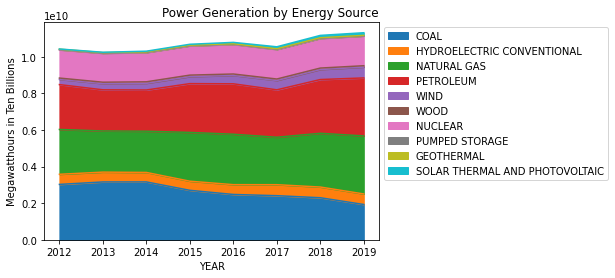

<Figure size 360x216 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [81]:
plot = finaldf.plot.area()
plot.legend(bbox_to_anchor=(1,1))
plt.title("Power Generation by Energy Source", loc="right")
plt.ylabel("Megawatthours in Ten Billions")
plt.figure(figsize=(5,3))
plt.show()
plt.savefig("PowerGeneration.png")

In [82]:
dftotals = finaldf
dftotals.loc["Total"]= dftotals.sum(axis=0)
dftotals.loc[:,"Total"] = dftotals.sum(axis=1)
dftotals

,COAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,PETROLEUM,WIND,WOOD,NUCLEAR,PUMPED STORAGE,GEOTHERMAL,SOLAR THERMAL AND PHOTOVOLTAIC,Total
YEAR,,,,,,,,,,,
2012,3.028086e+09,5.524804e+08,2.451788e+09,2.451788e+09,2.816434e+08,75598256.0,1.538662e+09,9900992.0,31124852.0,8653352.0,1.042973e+10
2013,3.162229e+09,5.371308e+08,2.249671e+09,2.249671e+09,3.356795e+08,80055073.0,1.578033e+09,9362066.0,31549348.0,18071240.0,1.025145e+10
2014,3.163421e+09,5.187332e+08,2.253218e+09,2.253218e+09,3.633106e+08,84679451.0,1.594332e+09,12347096.0,31753882.0,35382061.0,1.031039e+10
2015,2.704796e+09,4.981602e+08,2.666964e+09,2.666964e+09,3.814371e+08,83857014.0,1.594356e+09,10182976.0,31835150.0,49785806.0,1.068834e+10
2016,2.478297e+09,5.356243e+08,2.756614e+09,2.756614e+09,4.539851e+08,81894455.0,1.611388e+09,13372254.0,31651614.0,72108245.0,1.079155e+10
2017,2.411671e+09,6.006659e+08,2.592885e+09,2.592885e+09,5.086054e+08,82247042.0,1.609899e+09,12989096.0,31853548.0,106573734.0,1.055027e+10
2018,2.298975e+09,5.850480e+08,2.938265e+09,2.938265e+09,5.453349e+08,81872318.0,1.614169e+09,11809078.0,31934268.0,127650634.0,1.117332e+10
2019,1.929914e+09,5.757475e+08,3.171434e+09,3.171434e+09,5.898126e+08,77086766.0,1.618819e+09,10521488.0,30945434.0,143873644.0,1.131959e+10
Total,2.117739e+10,4.403590e+09,2.108084e+10,2.108084e+10,3.459809e+09,647290375.0,1.275966e+10,90485046.0,252648096.0,562098716.0,8.551465e+10


In [92]:
cpct = dftotals["COAL"] / dftotals["Total"] * 100
hecpct = dftotals["HYDROELECTRIC CONVENTIONAL"] / dftotals["Total"] * 100
ngpct = dftotals["NATURAL GAS"] / dftotals["Total"] * 100
ppct = dftotals["PETROLEUM"] / dftotals["Total"] * 100
wpct = dftotals["WIND"] / dftotals["Total"] * 100
wopct = dftotals["WOOD"] / dftotals["Total"] * 100
npct = dftotals["NUCLEAR"] / dftotals["Total"] * 100
pspct = dftotals["PUMPED STORAGE"] / dftotals["Total"] * 100
gpct = dftotals["GEOTHERMAL"] / dftotals["Total"] * 100
spct = dftotals["SOLAR THERMAL AND PHOTOVOLTAIC"] / dftotals["Total"] * 100
pctdf = pd.DataFrame({"Coal": cpct, "Hydroelectric Conventional": hecpct, "Natural Gas": ngpct, "Petroleum": ppct, "Wind": wpct, "Wood": wopct, "Nuclear": npct, "Pumped Storage": pspct, "Geothermal": gpct, "Solar Thermal and Photovoltaic":spct})
pctdf

,Coal,Hydroelectric Conventional,Natural Gas,Petroleum,Wind,Wood,Nuclear,Pumped Storage,Geothermal,Solar Thermal and Photovoltaic
YEAR,,,,,,,,,,
2012,29.033225,5.297171,23.507696,23.507696,2.700391,0.724835,14.752664,0.094931,0.298424,0.082968
2013,30.846647,5.239558,21.944901,21.944901,3.274458,0.780914,15.393262,0.091324,0.307755,0.176280
2014,30.681858,5.031168,21.853847,21.853847,3.523731,0.821302,15.463345,0.119754,0.307979,0.343169
2015,25.306050,4.660782,24.952093,24.952093,3.568722,0.784565,14.916778,0.095272,0.297849,0.465796
2016,22.965168,4.963368,25.544191,25.544191,4.206858,0.758876,14.931943,0.123914,0.293300,0.668192
2017,22.858842,5.693367,24.576469,24.576469,4.820779,0.779573,15.259312,0.123116,0.301922,1.010151
2018,20.575567,5.236114,26.297147,26.297147,4.880687,0.732748,14.446632,0.105690,0.285808,1.142459
2019,17.049329,5.086294,28.017221,28.017221,5.210549,0.681003,14.301039,0.092949,0.273380,1.271015
Total,24.764633,5.149516,24.651730,24.651730,4.045867,0.756935,14.921020,0.105812,0.295444,0.657313
